<a href="https://colab.research.google.com/github/Karlamch/karlaMCH/blob/main/ei_u3_04_%3C22150453%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-04-10',        # Fecha de inicio
    end='2025-04-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 d√≠a)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta autom√°ticamente los precios de cierre, apertura, m√°ximo y m√≠nimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del √≠ndice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un √≠ndice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


AAPL_Open   AAPL_High    AAPL_Low  AAPL_Close  AAPL_Adj Close  \
Date                                                                         
2024-04-10  168.800003  169.089996  167.110001  167.779999      166.772797   
2024-04-11  168.339996  175.460007  168.160004  175.039993      173.989212   
2024-04-12  174.259995  178.360001  174.210007  176.550003      175.490158   
2024-04-15  175.360001  176.630005  172.500000  172.690002      171.653305   
2024-04-16  171.750000  173.759995  168.270004  169.380005      168.363190   
...                ...         ...         ...         ...             ...   
2025-04-01  219.809998  223.679993  218.899994  223.190002      222.897705   
2025-04-02  221.320007  225.190002  221.020004  223.889999      223.596786   
2025-04-03  205.539993  207.490005  201.250000  203.190002      202.923904   
2025-04-04  193.889999  199.880005  187.339996  188.380005      188.133301   
2025-04-07  177.199997  194.149994  174.619995  181.460007      181.222366   

            AAPL_Volume  
Date                     
2024-04-10     49709300  
2024-04-11     91070300  
2024-04-12    101593300  
2024-04-15     73531800  
2024-04-16     73711200  
...                 ...  
2025-04-01     36412700  
2025-04-02     35905900  
2025-04-03    103419000  
2025-04-04    125910900  
2025-04-07    160466300  

[249 rows x 6 columns]

MEDIAS MOVILES

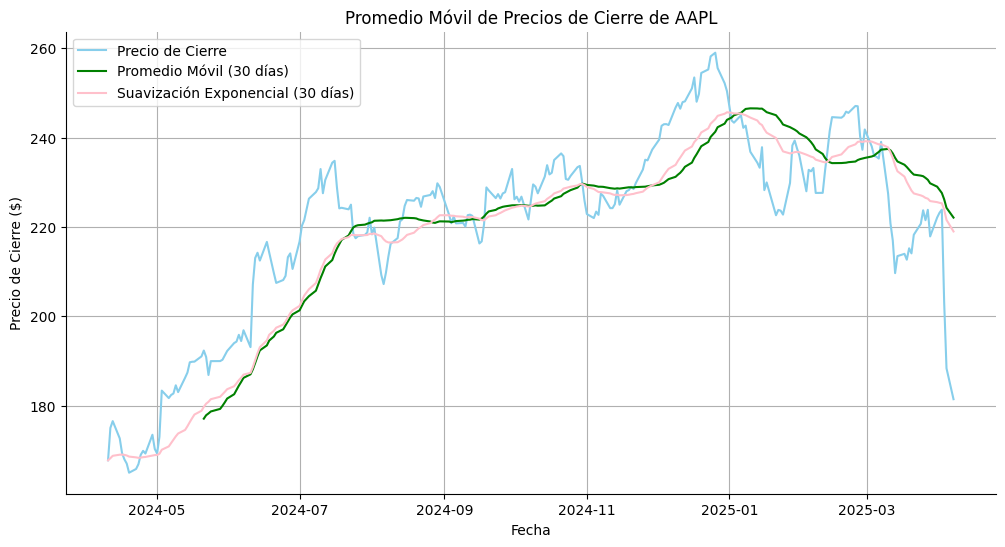

In [4]:
# Promedio M√≥vil Simple
ventana_sma = 30
df['SMA'] = df['AAPL_Close'].rolling(window=ventana_sma).mean()

# Promedio M√≥vil Exponencial
ventana_ses = 30
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='skyblue')
plt.plot(df['SMA'], label=f'Promedio M√≥vil ({ventana_sma} d√≠as)', color='green') #los colores con html se le agrega un gato
plt.plot(df['SES'], label=f'Suavizaci√≥n Exponencial ({ventana_ses} d√≠as)', color='pink')
plt.title('Promedio M√≥vil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Interpretaci√≥n.

El promedio m√≥vil de 30 d√≠as suaviza el precio, mostrando su direcci√≥n general. Cruces hacia arriba sugieren alzas, y hacia abajo, bajas. La suavizaci√≥n exponencial es parecida, pero da m√°s peso a los precios recientes, reaccionando m√°s r√°pido. Juntas, estas l√≠neas ayudan a ver la volatilidad diaria, la tendencia a corto plazo y posibles cambios cuando el precio cruza los promedios. Recuerda que son herramientas de an√°lisis y necesitan otras confirmaciones para invertir.

# Prueba Dickey-Fuller Aumentada

In [5]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hip√≥tesis nula (H‚ÇÄ): La serie tiene una ra√≠z unitaria (no es estacionaria).
#Hip√≥tesis alternativa (H‚ÇÅ): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretaci√≥n de la prueba ADF
print('Estad√≠stico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hip√≥tesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).")
#Para deterctar estacionalidad

Estad√≠stico ADF: -1.7739528573286973
p-value: 0.39346788381035025
La tendencia no es estacionaria (aceptamos la hip√≥tesis nula).


# Regresi√≥n polinomial


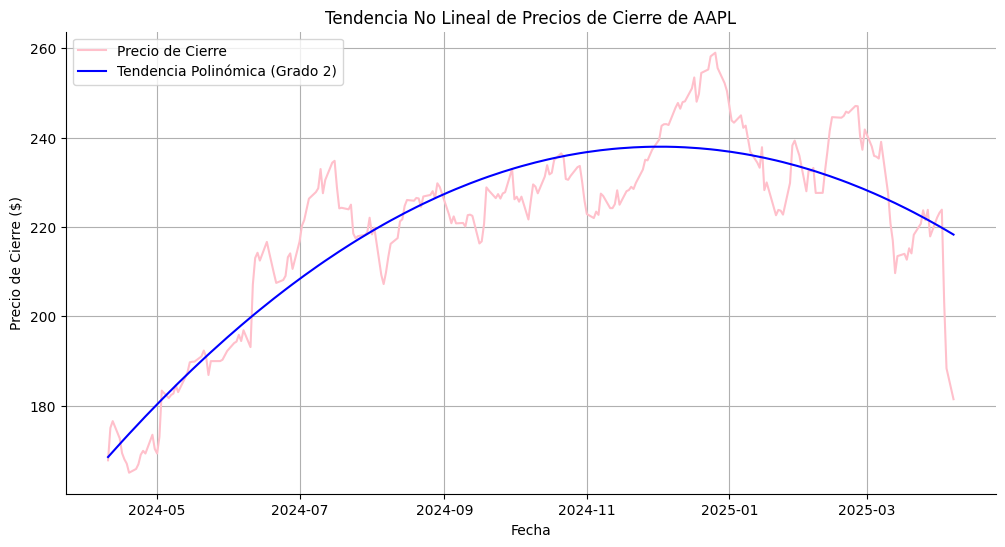

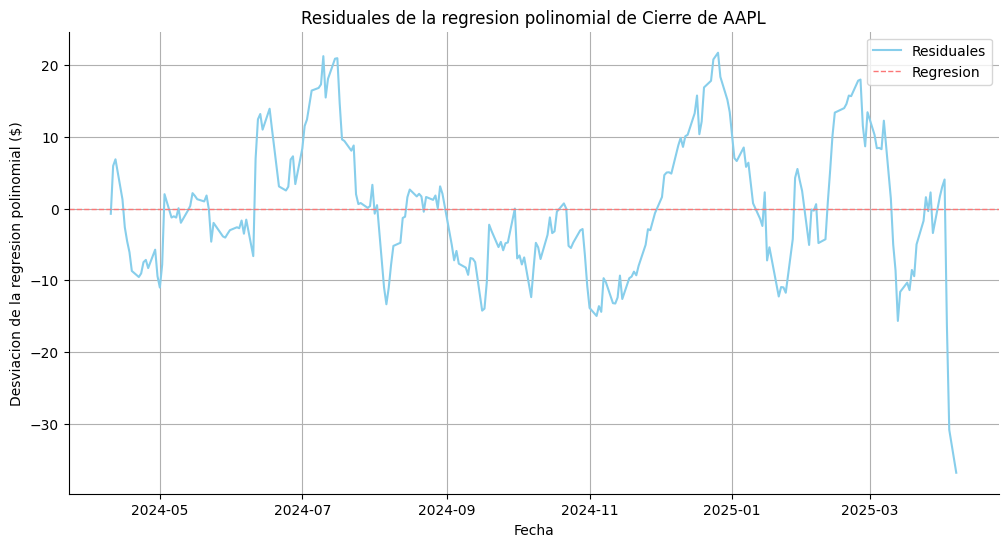

In [6]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a n√∫meros
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polin√≥mico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gr√°fica
plt.figure(
    figsize=(12, 6) # tama√±o (horizontal, vertical)
    )

# qu√© se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecer√° en la leyenda
    color='pink'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polin√≥mica (Grado {grado})', color='blue')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # T√≠tulo
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadr√≠cula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gr√°fico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['Poly_Resid'], label='Residuales', color='skyblue')
plt.axhline(0, color='#FB7777', label='Regresion',linestyle='--', linewidth=1)  # L√≠nea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#Representar la curva de forma m√°s suave

La primera gr√°fica model√≥ la tendencia a largo plazo con una curva polin√≥mica de grado 2, mostrando una subida hasta finales de 2024/principios de 2025 y luego una bajada. Esto suaviz√≥ el ruido diario, dando una visi√≥n general de la direcci√≥n del precio.

La segunda gr√°fica mostr√≥ los errores del modelo (residuales). Estos fluctuaron bastante alrededor de cero, indicando que la tendencia general fue capturada, pero no los cambios diarios oa medio plazo. Los errores grandes se√±alaron cu√°ndo la predicci√≥n se desvi√≥ del precio real. Sin un patr√≥n claro en los errores, no hay un sesgo obvio en el modelo, pero las fluctuaciones sugieren que otros factores afectar√°n el precio de AAPL adem√°s de esta tendencia simple.

## Para Pros: Series de Fourier

Las series de Fourier descomponen cualquier cosa como una suma de senos y cosenos. Por esta raz√≥n, son una herramienta √∫til para extraer patrones oscilantes. Este es un tema muy complicado y alejado a todo lo que han manejado, por esta raz√≥n no les voy a pedir que lo usen. Aqu√≠ lo he simplificado tanto como he podido por si se animan.

In [7]:
# Aqu√≠ no le muevan a nada
# B√°sicamente, lo que se hace este bloque es crear la funci√≥n
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La funci√≥n acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el par√°metro "terminos" es un n√∫mero natural que indica la cantidad de
  t√©rminos que desarrolla la serie. Entre mayor sea el n√∫mero de t√©rminos,
  la serie ser√° m√°s precisa, pero m√°s dif√≠cil de interpretar.

  La funci√≥n tiene como salida una lista con los componentes sinosoidales de serie.
  El √∫ltimo elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta l√≠nea con tu DataFrame y serie espec√≠ficos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en t√©rminos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el √≠ndice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # √≠ndice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la se√±al en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='#779BFB')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

  #Descompone los residuales, y la segunda tabla las suma y las acomoda a su favor

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.008032  6300.728394            124.50
1    0.004016  4123.318601            249.00
2    0.012048  3672.439065             83.00
3    0.020080  2583.720835             49.80
4    0.016064  1941.032569             62.25


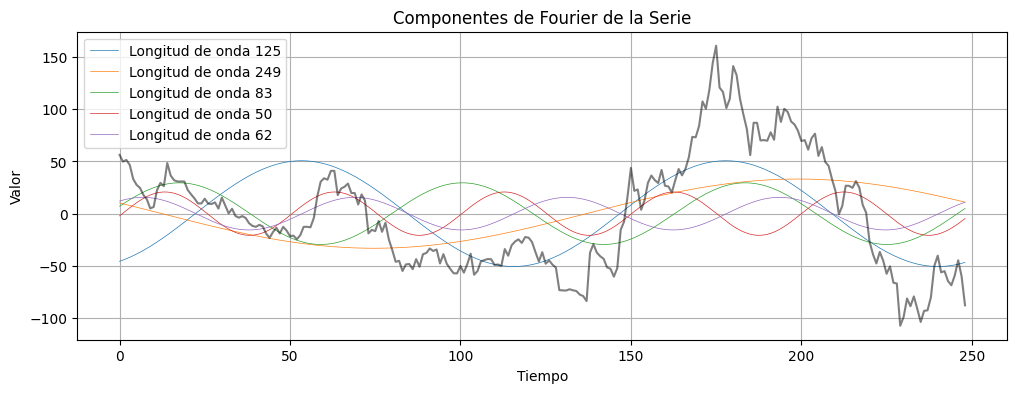

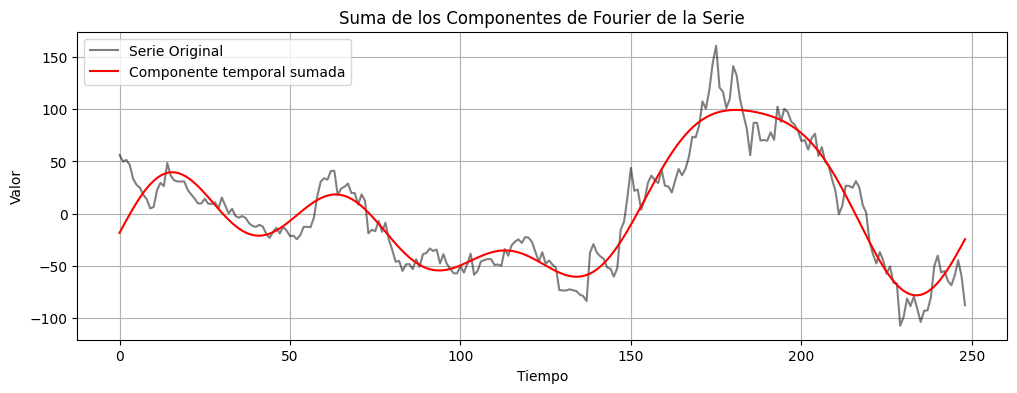

In [ ]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En estos gr√°ficos, la longitud de onda equivale a la unidad de tiempo (en este caso, d√≠as) que tarda la onda en volver al mismo sitio. Algo que en nuestro contexto podr√≠amos interpretar como estasionalidad. Vemos que la oscilaci√≥n m√°s grande se presenta cada 378 d√≠as. Dado que esto es m√°s de un a√±o, esto ser√≠a m√°s bien un ciclo. Sin embargo, se puede apreciar algo muy interesante, la longitud de onda siguiente es de 126 en unidades de tiempo (d√≠as) que es justo la mitad de la cantidad de d√≠as de negociaci√≥n en un a√±o!!! üòØ

√âste an√°lisis de Fourier revela las principales ondas sinusoidales que componen la serie de tiempo original. La tabla cuantifica la frecuencia, magnitud y longitud de onda de estos componentes, mientras que el gr√°fico los visualiza, mostrando c√≥mo diferentes ciclos de distintas duraciones contribuyen a las fluctuaciones observadas en la serie original.

√âste gr√°fico muestra c√≥mo la suma de los principales componentes de Fourier puede aproximar la serie de tiempo original, capturando sus tendencias y ciclos dominantes y suavizando las fluctuaciones de menor importancia. La calidad de la aproximaci√≥n depende de cu√°ntos y cu√°les componentes de Fourier se incluyan en la suma.


# Gr√°fico de autocorrelaci√≥n

El gr√°fico de autocorrelaci√≥n tiene como eje vertical los valores de la r de Pearson objenidos desplazando la serie hacia atr√°s en el tiempo. La medida de estos desplazamientos se muestra en el eje horizontal "lags". Se puede ver que de fondo hay una especie de sombra, esa sombra muestra el intervalo de confianza con el nivel de significancia que establezcan. Si la r de Pearson para un lag espec√≠fico est√° fuera fuera de esa sombra, hay un nivel de confianza para afirmar que $r\neq0$ y por lo tanto hay correlaci√≥n.
<br>
Este gr√°fico se usa para muchas cosas. Nosotros lo intentamos usar para obtener la estacionalidad, pero tambi√©n se usa para obtener algunos par√°metros del modelo ARIMA.

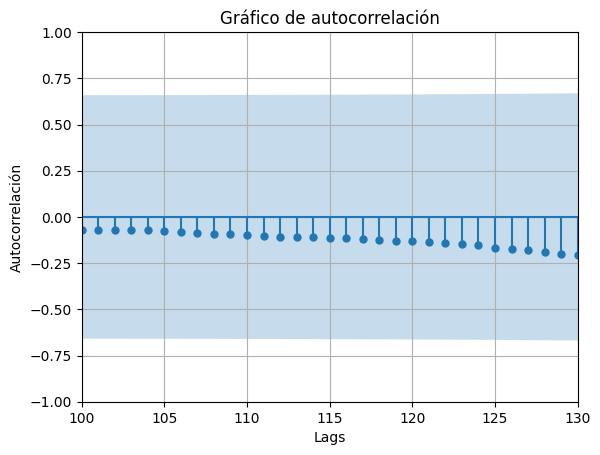

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['AAPL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gr√°fico de autocorrelaci√≥n')
plt.xlabel('Lags')
plt.ylabel('Autocorrelaci√≥n')
plt.grid()
plt.show()

# Gr√°fico de autocorrelaci√≥n parcial (PACF)

Su prop√≥sito principal es ayudar a identificar el orden de dependencia en una serie temporal (√∫til para ARIMA), es decir, cu√°ntos valores anteriores est√°n correlacionados con el valor actual, despu√©s de eliminar el efecto de las observaciones intermedias.

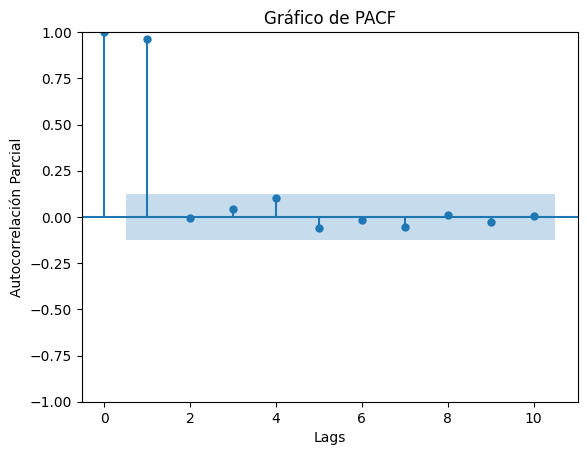

In [10]:
# Generar el gr√°fico PACF
from statsmodels.graphics.tsaplots import plot_pacf

nivel_de_significancia = 0.05
plot_pacf(df['AAPL_Close'], lags=10, alpha=nivel_de_significancia)
plt.title('Gr√°fico de PACF')
plt.xlabel('Lags')
plt.ylabel('Autocorrelaci√≥n Parcial')
plt.show()


 El gr√°fico de PACF sugiere fuertemente que la serie de tiempo subyacente podr√≠a ser modelada adecuadamente utilizando un modelo Autorregresivo de orden 1, donde el valor actual de la serie est√° directamente influenciado por su valor inmediatamente anterior.

# Descomposici√≥n de la serie

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

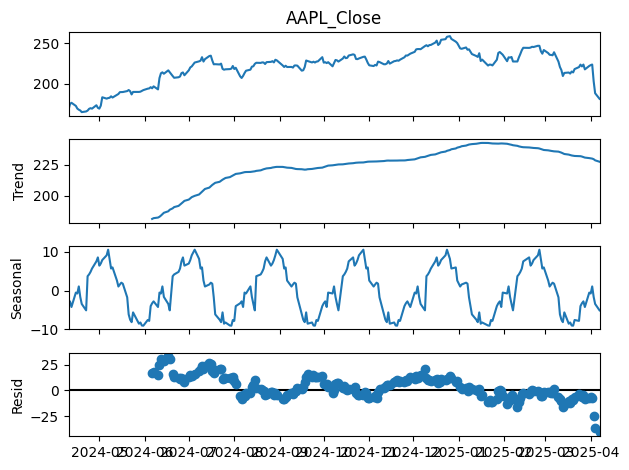

In [9]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['AAPL_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 d√≠as de negociaci√≥n al a√±o
fig = descomposicion.plot()
plt.show()


√âsta descomposici√≥n estacional nos ayuda a visualizar c√≥mo la tendencia subyacente, los patrones estacionales recurrentes y los factores residuales contribuyen al comportamiento del precio de cierre de Tesla a lo largo del tiempo. Analizar estos componentes por separado puede proporcionar informaci√≥n valiosa para la previsi√≥n y la comprensi√≥n de los impulsores del precio.

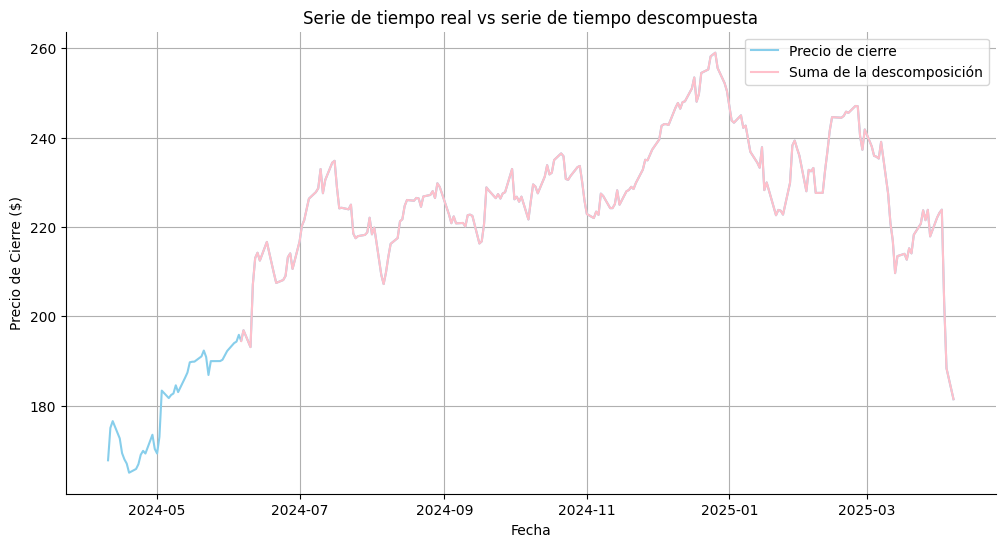

In [12]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposici√≥n', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

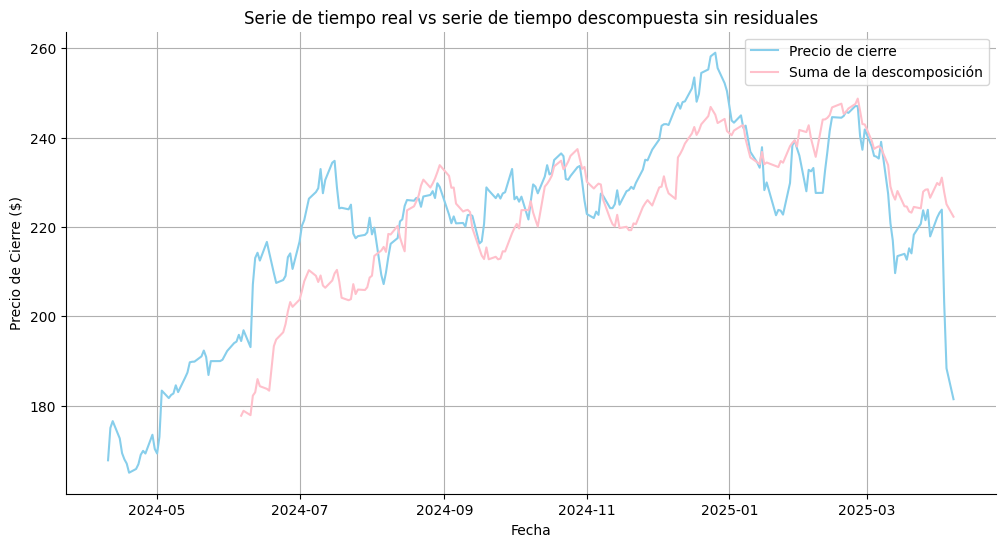

In [11]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposici√≥n', color="pink")
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

√âste gr√°fico visualiza el impacto de eliminar los residuos de la serie descompuesta. Nos muestra la parte del comportamiento del precio de cierre de AAPL que puede explicarse por la tendencia y la estacionalidad, y las diferencias revelan la magnitud de las fluctuaciones irregulares o no modeladas

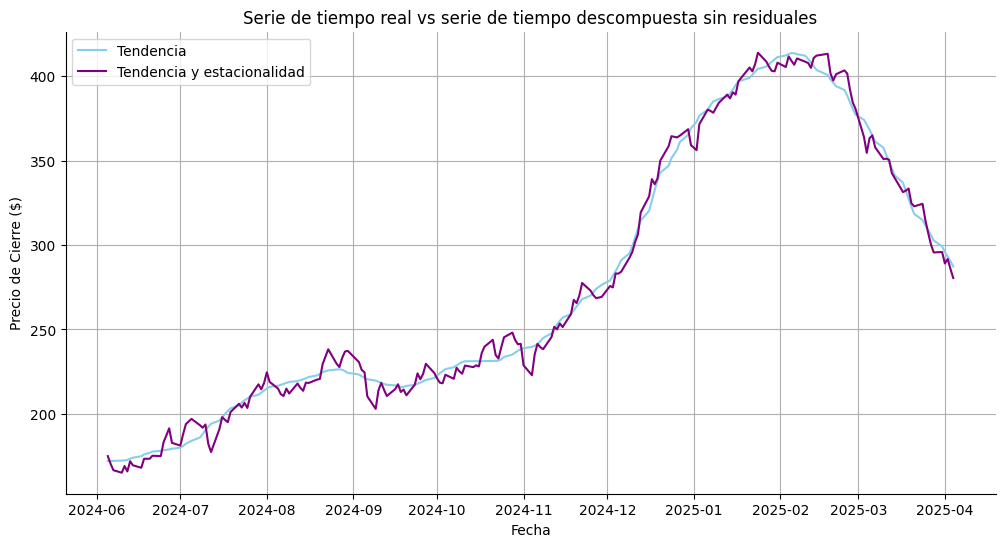

In [ ]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(descomposicion.trend, label='Tendencia', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Importante**: Es posible que hayan campturado bien la estacionalidad y que la prueba ADF de los residuales les indique que hay estacionariedad. Sin embargo, en el gr√°fico anterior vemos que no hay mucha diferencia entre la tendencia y la tendencia con estacionalidad. Por lo tanto, la estacionalidad, aunque existe, no es significativa. Esto se ilustra en el siguiente gr√°fico.

 Podemos observar c√≥mo la l√≠nea morada sigue la tendencia general de la l√≠nea azul clara, pero con oscilaciones superpuestas que representan el patr√≥n estacional. Estas oscilaciones parecen tener una frecuencia relativamente constante a lo largo del tiempo, lo que es caracter√≠stico de la estacionalidad.
 √âste gr√°fico destaca la contribuci√≥n de la componente estacional al comportamiento del precio de cierre de AAPL, mostrando c√≥mo se superpone a la tendencia subyacente para generar las fluctuaciones m√°s a corto plazo que observamos en la serie de tiempo real.

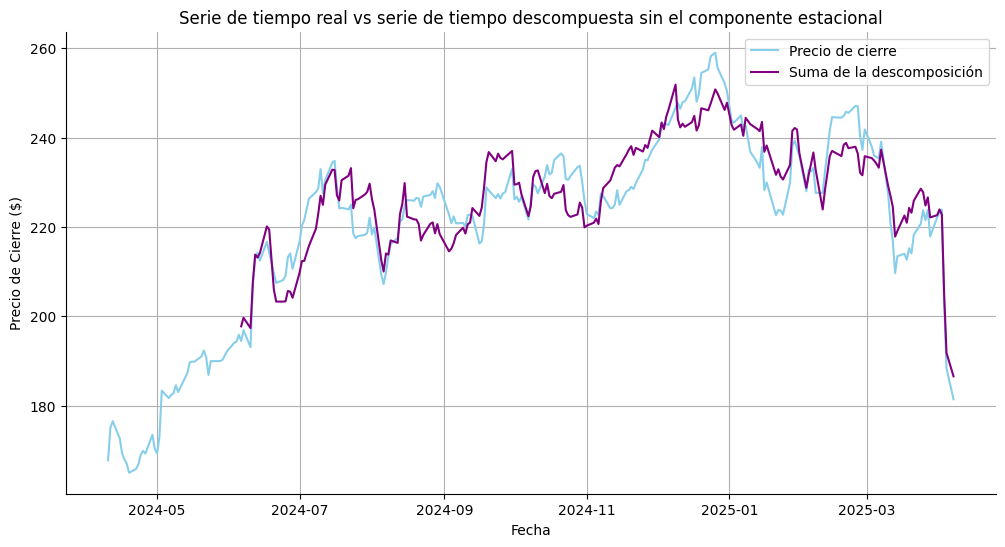

In [13]:
# Graficar descomposici√≥n
plt.figure(figsize=(12, 6)) # abre una nueva ventana gr√°fica
plt.plot(df['AAPL_Close'], label='Precio de cierre', color='skyblue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposici√≥n', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

En este gr√°fico, la l√≠nea morada sigue la tendencia general de la l√≠nea azul clara, pero las fluctuaciones de alta frecuencia que podr√≠an atribuirse a la estacionalidad se han suavizado.

Podemos observar que en algunos puntos, la l√≠nea azul tiene picos m√°s altos o valles m√°s bajos que la l√≠nea morada, lo que sugiere la influencia de la estacionalidad en esos momentos.
La diferencia entre las dos l√≠neas var√≠a a lo largo del tiempo, lo que indica que la magnitud de la influencia estacional puede no ser constante.
Nos permite ver c√≥mo se ver√≠a la serie de tiempo del precio de cierre de AAPL si se removieran los patrones estacionales. Las diferencias entre la serie real y esta versi√≥n desestacionalizada resaltan el impacto de la estacionalidad en las fluctuaciones del precio.

# Prueba Wilcoxon pareada para verificar si la estacionalidad tiene un efecto significativo

In [ ]:
from scipy.stats import wilcoxon

# Prueba Wilcoxon pareada para el efecto significativo de la estacionalidad

#Hip√≥tesis nula (H‚ÇÄ): Ambas series son iguales.
#Hip√≥tesis alternativa (H‚ÇÅ): Ambas series son diferentes

tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba de Wilcoxon
w_stat, p_valor = wilcoxon(tendencia, tendencia_estacionalidad)

print("Estad√≠stico de Wilcoxon:", w_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretaci√≥n de los resultados
if p_valor < 0.05:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hip√≥tesis nula.")
    print("Conclusi√≥n: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hip√≥tesis nula.")
    print("Conclusi√≥n: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estad√≠stico de Wilcoxon: 10418.0
Valor p: 0.5264138152571085


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hip√≥tesis nula.
Conclusi√≥n: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


# Prophet

In [ ]:
# Este data frame son del siguiente a√±o a df. Esto con el prop√≥sito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2018-01-01',        # Fecha de inicio
    end='2018-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 d√≠a)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta autom√°ticamente los precios de cierre, apertura, m√°ximo y m√≠nimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del √≠ndice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un √≠ndice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


AAPL_Open  AAPL_High   AAPL_Low  AAPL_Close  AAPL_Adj Close  \
Date                                                                      
2018-01-02  42.540001  43.075001  42.314999   43.064999       40.426826   
2018-01-03  43.132500  43.637501  42.990002   43.057499       40.419788   
2018-01-04  43.134998  43.367500  43.020000   43.257500       40.607529   
2018-01-05  43.360001  43.842499  43.262501   43.750000       41.069859   
2018-01-08  43.587502  43.902500  43.482498   43.587502       40.917316   
...               ...        ...        ...         ...             ...   
2018-12-21  39.215000  39.540001  37.407501   37.682499       35.905140   
2018-12-24  37.037498  37.887501  36.647499   36.707500       34.976128   
2018-12-26  37.075001  39.307499  36.680000   39.292500       37.439190   
2018-12-27  38.959999  39.192501  37.517502   39.037498       37.196232   
2018-12-28  39.375000  39.630001  38.637501   39.057499       37.215279   

            AAPL_Volume  
Date                     
2018-01-02    102223600  
2018-01-03    118071600  
2018-01-04     89738400  
2018-01-05     94640000  
2018-01-08     82271200  
...                 ...  
2018-12-21    382978400  
2018-12-24    148676800  
2018-12-26    234330000  
2018-12-27    212468400  
2018-12-28    169165600  

[250 rows x 6 columns]

In [ ]:
!pip install prophet

*CONCLUSI√ìN*

El precio de cierre de AAPL durante el per√≠odo analizado est√° influenciado por una tendencia alcista general, patrones estacionales de menor impacto, una dependencia significativa del precio del d√≠a anterior, y tambi√©n muestra algunas dependencias a largo plazo, adem√°s de fluctuaciones irregulares que no se explican f√°cilmente por estos componentes. Para una predicci√≥n precisa, ser√≠a necesario construir modelos estad√≠sticos que capturen estas diferentes caracter√≠sticas de la serie de tiempo.